In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

In [3]:
dfmg = pd.read_csv("dfmg_corrected_DIST_IS_GL.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [4]:
dfmg["DIST_min"] = dfmg.loc[:, ["DIST_GLINE", "DIST_ISE"]].min(axis=1)

In [5]:
#import plot_theta_sal
#importlib.reload(plot_theta_sal)

import plot_surfbot_vsTime as pltsurfbot
import plot_topView_contourf as topView

In [23]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

cdw = (dfmg['PSAL_ADJUSTED'] > 34.6) & (dfmg['CTEMP'] > 0)
maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_min'] <= 50
gline_le_100km = dfmg['DIST_min'] <= 100
gline_le_150km = dfmg['DIST_min'] <= 150
gline_le_25km = dfmg['DIST_min'] <= 25
gline_le_75km = dfmg['DIST_min'] <= 75

sel_echodepth = dfmg.ECHODEPTH > -3000

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [24]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [25]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [26]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8) & (dfmg.CTEMP >= -1.9)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [27]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

In [9]:
!mkdir ./Images/waterMassBudgets2

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/mySc

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassTh

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-0

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_e

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((sal

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((sal

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_wa

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_e

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_wa

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

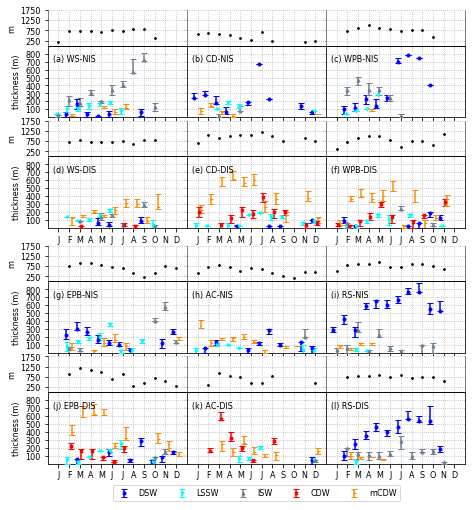

In [28]:
A1 = gline_le_50km & sel_echodepth
A2 = ~gline_le_50km & sel_echodepth

regions1 = [Weddell & A1, CDP & A1,    WPB & A1,   
            Weddell & A2, CDP & A2,    WPB & A2,   
            EPB & A1,     Adelie & A1, Ross & A1, 
            EPB & A2,     Adelie & A2, Ross & A2]

titles1 = ["(a) WS-NIS", "(b) CD-NIS", "(c) WPB-NIS",        
          "(d) WS-DIS", "(e) CD-DIS", "(f) WPB-DIS", 
          "(g) EPB-NIS","(h) AC-NIS", "(i) RS-NIS",
          "(j) EPB-DIS","(k) AC-DIS", "(l) RS-DIS" ] 

yticks = list(np.arange(100, 820, 100))
yticks_dod = list(np.arange(250,2000,500))
wmThk1_20 = pltwmthk.plot_array_waterMassThickness(dfmg,
            regions1, titles1, ht=9, save=True, ymax=900,
            savename="./Images/waterMassBudgets2/array1_20.png", 
            yticks=yticks, zbin=20.0,
            retValue=True, yticks_dod=yticks_dod, ymax_dod=None)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSample

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_wa

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((sal

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((sal

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:355: RuntimeWarning: invalid value encountered in greater_equal
  ls

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_wa

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_wa

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:299: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliceArray[randidxr] , axis=0)
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((sal

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in less_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/mySc

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:346: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  totalWaterColumnSampled[i] = len(timeSlice.loc[ctempnonull].groupby(pd.cut(timeSlice.loc[ctempnonull].DEPTH, depth_bins ) ).CTEMP.count().nonzero()[0]) * zbin_exact
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:354: RuntimeWarning: invalid value encountered in greater_equal
  DSWbins = ((salmean > 34.4) & (gammamean >= 28.27) & (thetamean <= -1.8) ) & (thetamean >= -1.9)                  # Williams et al. 2016
/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScrip

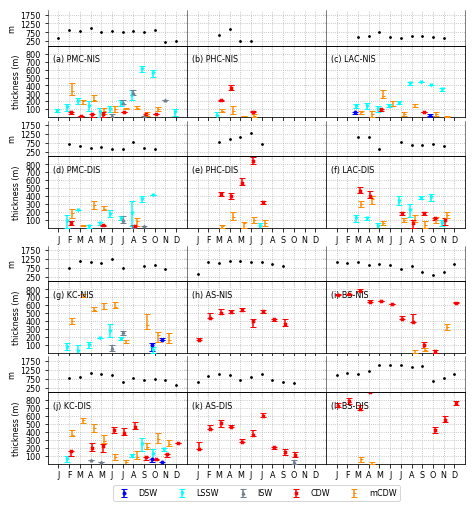

In [29]:
regions2 = [PrincessMartha & A1, Harald & A1, (LAC ) & A1,
            PrincessMartha & A2, Harald & A2, (LAC ) & A2,
            Knox & A1,  AS & A1, BS & A1, 
            Knox & A2, AS & A2, BS & A2]

titles2 = ["(a) PMC-NIS", "(b) PHC-NIS", "(c) LAC-NIS", 
           "(d) PMC-DIS", "(e) PHC-DIS", "(f) LAC-DIS",
           "(g) KC-NIS", "(h) AS-NIS", "(i) BS-NIS", 
           "(j) KC-DIS", "(k) AS-DIS", "(l) BS-DIS"]

yticks = list(np.arange(100, 820, 100)) 
yticks_dod = list(np.arange(250,2000,500))
wmThk2_20 = pltwmthk.plot_array_waterMassThickness(dfmg, 
            regions2, titles2, ht=9, save=True, ymax=900, retValue = True, zbin=20.0,
            savename="./Images/waterMassBudgets2/array2_20.png", yticks=yticks, 
            yticks_dod=yticks_dod, ymax_dod=2000)

In [30]:
DSWthickness12 = np.append(wmThk1_20[0].ravel(), wmThk2_20[0].ravel())
DSW_CI_12 = list(np.array((list(wmThk1_20[1]) + list(wmThk2_20[1]) )).reshape(288,2))

ISWthickness12 = np.append(wmThk1_20[4].ravel(), wmThk2_20[4].ravel())
ISW_CI_12 = list(np.array(list(wmThk1_20[5]) + list(wmThk2_20[5]) ).reshape(288,2))

lsswthickness12 = np.append(wmThk1_20[2].ravel(), wmThk2_20[2].ravel())
lssw_CI_12 = list(np.array(list(wmThk1_20[3]) + list(wmThk2_20[3]) ).reshape(288,2))

CDWthickness12 = np.append(wmThk1_20[8].ravel(), wmThk2_20[8].ravel())
CDW_CI_12 = list(np.array(list(wmThk1_20[9]) + list(wmThk2_20[9]) ).reshape(288,2))

mCDWthickness12 = np.append(wmThk1_20[6].ravel(), wmThk2_20[6].ravel())
mCDW_CI_12 = list(np.array(list(wmThk1_20[7]) + list(wmThk2_20[7]) ).reshape(288,2))

zlowest12 = np.append(wmThk1_20[-1].ravel(), wmThk2_20[-1].ravel())

titles = []
for t in titles1:
    titles.append([t.split()[1] ]*12)
for t in titles2:
    titles.append([t.split()[1] ]*12)

ind = np.arange(len(DSWthickness12))
waterMassThickness_20 = pd.DataFrame({'DSW':pd.Series(DSWthickness12, index=ind),
                                   'DSW_CI':pd.Series(DSW_CI_12, index=ind),
                                   'ISW':pd.Series(ISWthickness12, index=ind),
                                   'ISW_CI':pd.Series(ISW_CI_12, index=ind),
                                   'LSSW':pd.Series(lsswthickness12, index=ind),
                                   'LSSW_CI':pd.Series(lssw_CI_12, index=ind),
                                   'mCDW':pd.Series(mCDWthickness12, index=ind),
                                   'mCDW_CI':pd.Series(mCDW_CI_12, index=ind),
                                   'CDW':pd.Series(CDWthickness12, index=ind),
                                   'CDW_CI':pd.Series(CDW_CI_12, index=ind),
                                   'zlowest':pd.Series(zlowest12, index=ind),
                                   'month':pd.Series(list(np.arange(1,13,1))*24, index=ind),
                                   'region': pd.Series(np.array(titles).ravel(), index=ind)
                                  })

In [12]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

In [30]:
waterMassThickness_20.columns

Index(['CDW', 'CDW_CI', 'DSW', 'DSW_CI', 'ISW', 'ISW_CI', 'LSSW', 'LSSW_CI',
       'mCDW', 'mCDW_CI', 'month', 'region', 'zlowest'],
      dtype='object')

$P(DSW\, |\, noCDW) = \frac{P(DSW\, \cap\, noCDW)}{P(noCDW)}$

In [67]:
import compute_waterMassProbabilities as wmprob
importlib.reload(wmprob)

<module 'compute_waterMassProbabilities' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/compute_waterMassProbabilities.py'>

[0.08474576 0.14814815] [[0.0672019  0.08474576]
 [0.08932462 0.11185185]]


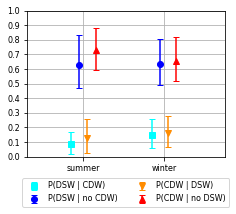

 P(DSW | CDW)= [0.08474576 0.14814815] [[0.01754386 0.16949153]
 [0.05882353 0.26      ]] 
 P(DSW | no CDW)= [0.62962963 0.63636364] [[0.47056595 0.83673469]
 [0.49295775 0.80701754]] 
 P(CDW | DSW)= [0.12820513 0.16      ] [[0.02777778 0.25806452]
 [0.06449897 0.28      ]] 
 P(CDW | no DSW)= [0.72972973 0.65714286] [[0.59493671 0.88235294]
 [0.51898734 0.82145737]]


In [68]:
prob_DSW_cond_noCDW, prob_DSW_cond_noCDW_CI, prob_DSW_cond_noCDW_yerr = wmprob.compute_prob_unweighted_bootstrapped(waterMassThickness_20, 
                                            save=True, 
                                            savename="./Images/waterMassBudgets2/wmprobUnweighted_20_bootstrapped.png")

In [38]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, round(p,4), lo, hi, [lo,hi]

In [39]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            #1-round(pearsonr(df[r], df[c])[1], 4)
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [40]:
calculate_pvalues(waterMassThickness_20.dropna().groupby("region").mean(), retValue="r")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month
DSW,1,0.441636,-0.260226,-0.285488,-0.380039,-0.0993768,0.0638229
ISW,0.441636,1,0.00384041,-0.236425,-0.416987,-0.109048,-0.0502081
LSSW,-0.260226,0.00384041,1,0.236716,-0.426174,-0.360382,0.500277
mCDW,-0.285488,-0.236425,0.236716,1,-0.253132,0.16047,0.317904
CDW,-0.380039,-0.416987,-0.426174,-0.253132,1,0.693711,-0.1764
zlowest,-0.0993768,-0.109048,-0.360382,0.16047,0.693711,1,-0.0514505
month,0.0638229,-0.0502081,0.500277,0.317904,-0.1764,-0.0514505,1


In [41]:
calculate_pvalues(waterMassThickness_20.dropna().groupby("region").mean(), retValue="CI")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month
DSW,"[1.0, 1.0]","[0.04652882276693559, 0.7172513041556204]","[-0.6005775233714051, 0.15996264638693866]","[-0.6177421465290656, 0.13325549464116274]","[-0.6792955305115181, 0.027586603045124485]","[-0.4833950649500484, 0.3167164959761232]","[-0.3485475120364554, 0.45549250800783325]"
ISW,"[0.04652882276693559, 0.7172513041556204]","[1.0, 1.0]","[-0.400176257011229, 0.40660719964020814]","[-0.5841133983821951, 0.18457471214263418]","[-0.7022563453231951, -0.01633864203706847]","[-0.49085238776518497, 0.3078927000774574]","[-0.44459999684276963, 0.3604898737828662]"
LSSW,"[-0.6005775233714051, 0.15996264638693866]","[-0.400176257011229, 0.40660719964020814]","[1.0, 1.0]","[-0.18427765930166407, 0.5843159546195998]","[-0.7078746878345341, -0.027505720150235717]","[-0.6668362228725794, 0.05033162582177947]","[0.12137521590302261, 0.751927308342542]"
mCDW,"[-0.6177421465290656, 0.13325549464116274]","[-0.5841133983821951, 0.18457471214263418]","[-0.18427765930166407, 0.5843159546195998]","[1.0, 1.0]","[-0.5957002569895811, 0.16735354597294963]","[-0.25974070268025384, 0.5295848956696856]","[-0.09806889349963228, 0.6393143635165683]"
CDW,"[-0.6792955305115181, 0.027586603045124485]","[-0.7022563453231951, -0.01633864203706847]","[-0.7078746878345341, -0.027505720150235717]","[-0.5957002569895811, 0.16735354597294963]","[1.0, 1.0]","[0.40312471391130755, 0.8572219302094402]","[-0.5412800141228349, 0.2443866652324808]"
zlowest,"[-0.4833950649500484, 0.3167164959761232]","[-0.49085238776518497, 0.3078927000774574]","[-0.6668362228725794, 0.05033162582177947]","[-0.25974070268025384, 0.5295848956696856]","[0.40312471391130755, 0.8572219302094402]","[1.0, 1.0]","[-0.4455988452208789, 0.3594056365300699]"
month,"[-0.3485475120364554, 0.45549250800783325]","[-0.44459999684276963, 0.3604898737828662]","[0.12137521590302261, 0.751927308342542]","[-0.09806889349963228, 0.6393143635165683]","[-0.5412800141228349, 0.2443866652324808]","[-0.4455988452208789, 0.3594056365300699]","[1.0, 1.0]"


In [42]:
waterMassThickness_20.to_csv("waterMassThickness_20.csv")